In [ ]:
#Load necessary library
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf
import keras

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
keras.utils.set_random_seed(51)

In [4]:
#Assign all folder paths to a variable
#Train data
train_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
train_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'

#Test data
test_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'
test_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL'

#Validation data
val_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA'
val_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL'


#Extract the images from path and assign to variables
#Train data
train_pn = [os.path.join(train_pneumonia_dir, i) for i in os.listdir(train_pneumonia_dir)]
train_nn = [os.path.join(train_normal_dir, i) for i in os.listdir(train_normal_dir)]

#Test data
test_pn = [os.path.join(test_pneumonia_dir, i) for i in os.listdir(test_pneumonia_dir)]
test_nn = [os.path.join(test_normal_dir, i) for i in os.listdir(test_normal_dir)]

#Validation data
val_pn = [os.path.join(val_pneumonia_dir, i) for i in os.listdir(val_pneumonia_dir)]
val_nn = [os.path.join(val_normal_dir, i) for i in os.listdir(val_normal_dir)]

#Explore the total number of images
Total_images = len(train_pn + train_nn + test_pn + test_nn + val_pn + val_nn)
Total_pneumonia = len(train_pn + test_pn + val_pn)
Total_normal = len(train_nn + test_nn + val_nn)

print('Total images :', Total_images)
print('Pneumonia images :', Total_pneumonia)
print('Normal images :', Total_normal)

Total images : 5856
Pneumonia images : 4273
Normal images : 1583


# **Preprocessing. **

my system is incapable pf 5856 images. better to do with 2000 images(1000 images each). 

In [8]:

# Define the desired number of images for each class
desired_num_images = 1000

#Combine the train/val/test set of for each class
pneumonia = train_pn + test_pn + val_pn
normal = train_nn + test_nn + val_nn

# Shuffle the pneumonia and normal image lists
random.shuffle(pneumonia)
random.shuffle(normal)

# Undersample the dataset to the desired number of images for each class
pneumonia_undersampled = pneumonia[:desired_num_images]
normal_undersampled = normal[:desired_num_images]

# Update the total number of images and pneumonia/normal counts
Total_images_undersampled = len(pneumonia_undersampled + normal_undersampled)
Total_pneumonia_undersampled = len(pneumonia_undersampled)
Total_normal_undersampled = len(normal_undersampled)

print("After undersampling:\n")
print(f"{'Total:':<30} {Total_images_undersampled}")
print(f"{'Pneumonia:':<30} {Total_pneumonia_undersampled}")
print(f"{'Normal:':<30} {Total_normal_undersampled}")

After undersampling:

Total:                         2000
Pneumonia:                     1000
Normal:                        1000


In [ ]:
#Combine and split the data set according to desire ratio [Train:Val:Test - 80:10:10]
train_set = pneumonia_undersampled[:240]+ normal_undersampled[:240]
test_set = pneumonia_undersampled[240:270]+ normal_undersampled[240:270]
val_set = pneumonia_undersampled[270:] + normal_undersampled[270:]

random.shuffle(train_set)
random.shuffle(test_set)
random.shuffle(val_set)

print("Total Train Images %s containing %s pneumonia and %s normal images"
      % (len(train_set),len(pneumonia_undersampled[:240]),len(normal_undersampled[:240])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_set),len(pneumonia_undersampled[240:270]),len(normal_undersampled[240:270])))
print("Total validation Images %s containing %s pneumonia and %s normal images"
      % (len(val_set),len(pneumonia_undersampled[270:]),len(normal_undersampled[270:])))


In [9]:
import random

desired_num_images = 1000

# Combine the train/val/test set for each class
pneumonia = train_pn + test_pn + val_pn
normal = train_nn + test_nn + val_nn

# Shuffle the pneumonia and normal image lists
random.shuffle(pneumonia)
random.shuffle(normal)

# Undersample the dataset to the desired number of images for each class
pneumonia_undersampled = pneumonia[:desired_num_images]
normal_undersampled = normal[:desired_num_images]

# Update the total number of images and pneumonia/normal counts
Total_images_undersampled = len(pneumonia_undersampled + normal_undersampled)
Total_pneumonia_undersampled = len(pneumonia_undersampled)
Total_normal_undersampled = len(normal_undersampled)

print('The number of total images after undersampling is', Total_images_undersampled)
print('The total number of pneumonia images after undersampling is', Total_pneumonia_undersampled)
print('The total number of normal images after undersampling is', Total_normal_undersampled)

# Combine and split the dataset according to the desired ratio [Train:Val:Test - 80:10:10]
train_size = int(0.8 * desired_num_images)
val_size = int(0.1 * desired_num_images)
test_size = desired_num_images - train_size - val_size  # Adjust if necessary

train_set = pneumonia_undersampled[:train_size] + normal_undersampled[:train_size]
val_set = pneumonia_undersampled[train_size:train_size + val_size] + normal_undersampled[train_size:train_size + val_size]
test_set = pneumonia_undersampled[train_size + val_size:] + normal_undersampled[train_size + val_size:]

# Shuffle the train, validation, and test sets
random.shuffle(train_set)
random.shuffle(val_set)
random.shuffle(test_set)

print("Total Train Images %s containing %s pneumonia and %s normal images"
      % (len(train_set), len(pneumonia_undersampled[:train_size]), len(normal_undersampled[:train_size])))
print("Total Validation Images %s containing %s pneumonia and %s normal images"
      % (len(val_set), len(pneumonia_undersampled[train_size:train_size + val_size]), len(normal_undersampled[train_size:train_size + val_size])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_set), len(pneumonia_undersampled[train_size + val_size:]), len(normal_undersampled[train_size + val_size:])))


The number of total images after undersampling is 2000
The total number of pneumonia images after undersampling is 1000
The total number of normal images after undersampling is 1000
Total Train Images 1600 containing 800 pneumonia and 800 normal images
Total Validation Images 200 containing 100 pneumonia and 100 normal images
Total Test Images 200 containing 100 pneumonia and 100 normal images


In [10]:
#Explore the pixel size of the images; open first image for the dataset
train_img = cv2.imread(train_set[0], cv2.IMREAD_GRAYSCALE)
test_img = cv2.imread(test_set[0], cv2.IMREAD_GRAYSCALE)
val_img = cv2.imread(val_set[0], cv2.IMREAD_GRAYSCALE)

train_height, train_width = train_img.shape
test_height, test_width = test_img.shape
val_height, val_width = val_img.shape

print('The pixel size of the 1st image in train set is', f"Width: {train_width} pixels", 'and', f"Height: {train_height} pixels")
print('The pixel size of the 1st image in test set is', f"Width: {test_width} pixels", 'and', f"Height: {test_height} pixels")
print('The pixel size of the 1st image in val set is', f"Width: {val_width} pixels", 'and', f"Height: {val_height} pixels")

The pixel size of the 1st image in train set is Width: 1104 pixels and Height: 656 pixels
The pixel size of the 1st image in test set is Width: 1160 pixels and Height: 752 pixels
The pixel size of the 1st image in val set is Width: 1016 pixels and Height: 848 pixels


In [23]:
#Train with VGG16 model
#Preprocess the data so it can fit into VGG-16
def preprocess_image_VGG16(image_list, new_size=(224, 224)):

    X = []  # images
    y = []  # labels

    for image in image_list:
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, new_size)
        img_normalize = img_resized.astype(np.float32)/255.0
        X.append(img_normalize)


        if 'NORMAL' in image:
           y.append(0)
        elif 'IM' in image:
           y.append(0)
        elif 'virus' in image or 'bacteria' in image:
           y.append(1)
        else:
            print(f"Warning: Unable to load image {image}")

    return X, y

In [24]:
#Preprocess the dataset
X1,y1 = preprocess_image_VGG16(train_set)
A1,b1 = preprocess_image_VGG16(test_set)
C1,d1 = preprocess_image_VGG16(val_set)

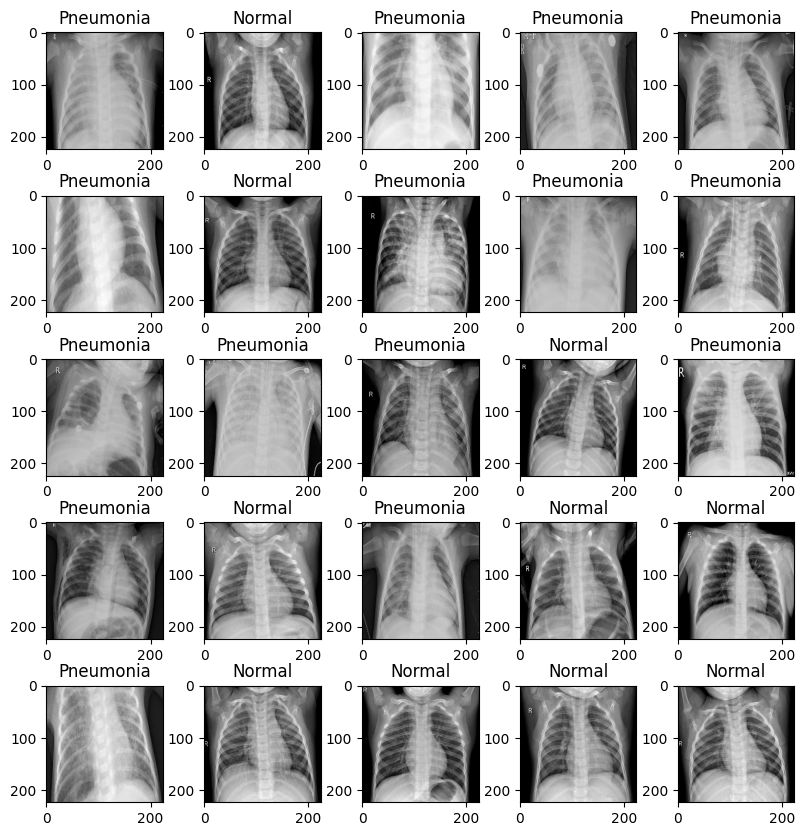

In [26]:
#Visualize the images in the train set
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.4)
k=1
for i in range(25):
    a = fig.add_subplot(5, 5, k)

    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(X[i], cmap='gray')
    k=k+1;

In [27]:
#Train with pre-train VGG-16 model
#Import necessary library
from keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import binary_crossentropy

#Load the pre-trained model without the top classification layer
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

#Create new model
main_model = models.Sequential()

#Add VGG16 as pre-trained model
main_model.add(base_model)

#Flatten output of the base model
main_model.add(layers.Flatten())

#Add new dense layers for classification
main_model.add(layers.Dense(256, activation=  'relu'))
main_model.add(layers.Dense(1,  activation = 'sigmoid'))

#Freeze the layers in the base model
for layer in base_model.layers:
  layer.trainable = False


#Compile the model
import keras
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

main_model.compile(optimizer= optimizer, loss= binary_crossentropy, metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
#Convert the dataset into numpy array as the fit() expects an numpy array
X_train = np.array(X1)
y_train = np.array(y1)
X_test = np.array(A1)
y_test = np.array(b1)
X_val = np.array(C1)
y_val = np.array(d1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1600, 224, 224, 3)
(1600,)
(200, 224, 224, 3)
(200,)
(200, 224, 224, 3)
(200,)


In [30]:
#Train the model
#model_history1 = main_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 503s 10s/step - accuracy: 0.9208 - loss: 0.3882 - val_accuracy: 0.9750 - val_loss: 0.0941
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 512s 10s/step - accuracy: 0.9629 - loss: 0.1029 - val_accuracy: 0.9700 - val_loss: 0.1038
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 506s 10s/step - accuracy: 0.9778 - loss: 0.0757 - val_accuracy: 0.9650 - val_loss: 0.1424
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 502s 10s/step - accuracy: 0.9722 - loss: 0.0957 - val_accuracy: 0.9550 - val_loss: 0.1521
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 563s 10s/step - accuracy: 0.9560 - loss: 0.1263 - val_accuracy: 0.9250 - val_loss: 0.2681
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 504s 10s/step - accuracy: 0.9436 - loss: 0.1620 - val_accuracy: 0.9550 - val_loss: 0.2126
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 506s 10s/step - accuracy: 0.9649 - loss: 0.1185 - val_accuracy: 0.9700 - val_loss: 0.0929
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 559s 10s/step - accuracy: 0.9910 - loss: 0.0400 - val_accuracy: 0.

In [34]:
#Calculate the confusion matrix and performance matrix
#Import necessary library
from sklearn.metrics import accuracy_score, confusion_matrix

#Print out the confusion matrix and performance matrix
preds = main_model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX')
print(cm)

precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step
CONFUSION MATRIX
[[94  6]
 [ 2 98]]
Accuracy: 96.0%
Precision: 94.23076923076923%
Recall: 98.0%
F1-score: 96.07843137254902


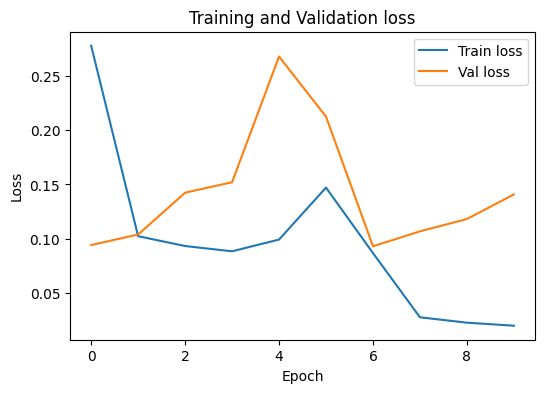

In [32]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(model_history1.history['loss'], label='Train loss')
plt.plot(model_history1.history['val_loss'], label='Val loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

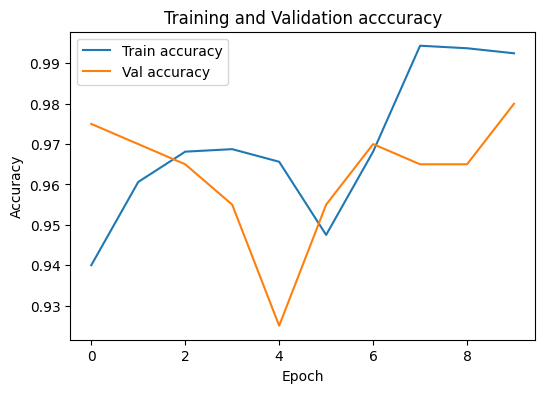

In [33]:
# Plot training & validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(model_history1.history['accuracy'], label='Train accuracy')
plt.plot(model_history1.history['val_accuracy'], label='Val accuracy')
plt.title('Training and Validation acccuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()